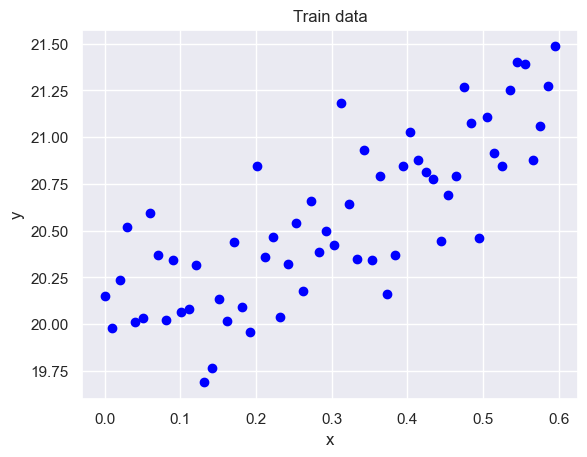

Epoch 1, Loss: 388.18646968695856
Beta0 = 0.47688898435142923; Beta1 = 1.2500574405902056
------------------
Epoch 2, Loss: 371.4582634812222
Beta0 = 0.8708926312129653; Beta1 = 1.3679085579452201
------------------
Epoch 3, Loss: 355.45230977818875
Beta0 = 1.256313860094448; Beta1 = 1.4831301617815786
------------------
Epoch 4, Loss: 340.1374234014224
Beta0 = 1.6333399901936194; Beta1 = 1.5957796787308083
------------------
Epoch 5, Loss: 325.4837656791485
Beta0 = 2.0021542520847464; Beta1 = 1.705913281951429
------------------
Epoch 6, Loss: 311.46278630525734
Beta0 = 2.3629358769612816; Beta1 = 1.813585918488606
------------------
Epoch 7, Loss: 298.04716771061675
Beta0 = 2.7158601839306202; Beta1 = 1.918851336036619
------------------
Epoch 8, Loss: 285.21077183630484
Beta0 = 3.0610986654034678; Beta1 = 2.021762109117187
------------------
Epoch 9, Loss: 272.9285892050526
Beta0 = 3.3988190706194086; Beta1 = 2.1223696646863965
------------------
Epoch 10, Loss: 261.17669019166556
B

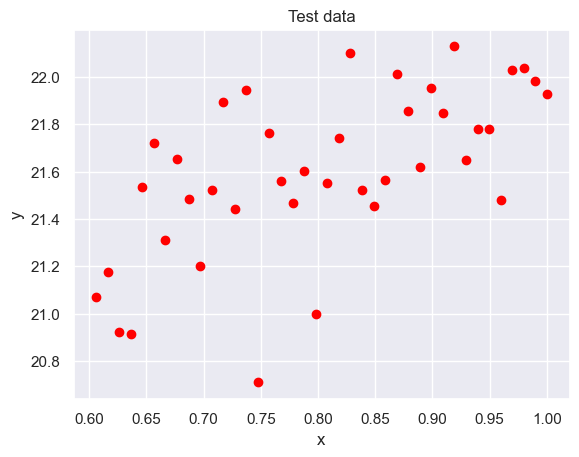

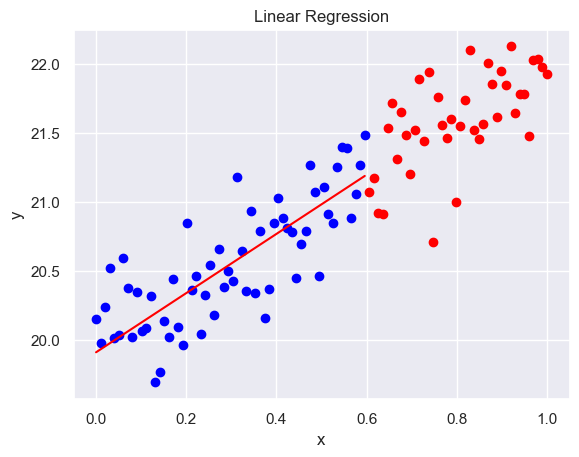

The loss on the test data: 0.07538525133630869


In [4]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class DataHandler:
    def __init__(self):
        self.data = []

    def load_csv_file(self, path):
        with open(path) as file:
            next(csv.reader(file))  # skip the header row
            self.data = [list(map(float, row[1:])) for row in csv.reader(file)]
    
    def get_data(self):
        return self.data


class LinearRegression:
    def __init__(self):
        self.beta0 = 0
        self.beta1 = 0

    def calculate_linear_regression(self, x):
        return self.beta0 + self.beta1 * x

    def calculate_loss(self, predicted, actual):
        return np.mean((np.array(predicted) - np.array(actual)) ** 2)

    def train_model(self, data, tolerance=0.000001, learning_rate=0.01):
        x_values, y_values = np.array(data)[:, 0].astype(float), np.array(data)[:, 1].astype(float)
        self.beta0, self.beta1 = np.random.randn(), np.random.randn()
        predicted_y = self.calculate_linear_regression(x_values)
        loss_val = self.calculate_loss(predicted_y, y_values)
        delta = 100
        epoch_number = 0

        while tolerance < delta:
            diff_y_values = y_values - predicted_y
            derivative_beta0 = - (2 / len(diff_y_values)) * np.sum(diff_y_values)
            derivative_beta1 = - (2 / len(diff_y_values)) * np.sum(np.multiply(diff_y_values, x_values))
            self.beta0 -= learning_rate * derivative_beta0
            self.beta1 -= learning_rate * derivative_beta1
            predicted_y = self.calculate_linear_regression(x_values)
            current_loss = self.calculate_loss(predicted_y, y_values)
            delta, loss_val, epoch_number = loss_val - current_loss, current_loss, epoch_number + 1
            print(f'Epoch {epoch_number}, Loss: {loss_val}')
            print(f'Beta0 = {self.beta0}; Beta1 = {self.beta1}')
            print('------------------')

        return {"beta0": self.beta0, "beta1": self.beta1}


class Plotter:
    def __init__(self):
        sns.set()

    def plot_data(self, x, y, color='blue'):
        plt.scatter(x, y, color=color)

    def plot_regression_line(self, x, y, beta_object, color='red'):
        x_values = np.linspace(min(x), max(x), 100)
        y_values = [beta_object["beta0"] + beta_object["beta1"] * x for x in x_values]
        plt.plot(x_values, y_values, color=color)
        
    def show_plot(self, title):
        plt.title(title)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()


if __name__ == '__main__':
    # Load training data and visualize it
    data_handler = DataHandler()
    data_handler.load_csv_file(r'lab_1_train.csv')
    x_train, y_train = zip(*data_handler.get_data())

    plotter = Plotter()
    plotter.plot_data(x_train, y_train, color='blue')
    plotter.show_plot("Train data")

    # Train the model and get beta0 and beta1 values
    linear_regression = LinearRegression()
    beta_values = linear_regression.train_model(data_handler.get_data())

    # Load test data and visualize it
    data_handler.load_csv_file(r'lab_1_test.csv')
    x_test, y_test = zip(*data_handler.get_data())

    plotter.plot_data(x_test, y_test, color='red')
    plotter.show_plot("Test data")

    # Plot the regression line
    plotter.plot_regression_line(x_train, y_train, beta_values, color='red')
    plotter.plot_data(x_train, y_train, color='blue')
    plotter.plot_data(x_test, y_test, color='red')
    plotter.show_plot("Linear Regression")

    # Make predictions on the test data
    predicted_values = [linear_regression.calculate_linear_regression(x) for x in x_test]

    # Calculate the loss on the test data
    loss = linear_regression.calculate_loss(predicted_values, y_test)
    print(f"The loss on the test data: {loss}")
